# Part I - FORD GO BIKE
## by Matthew

## Introduction
> The dataset I would use in this project is the Ford Go Bike and it includes information about the individual rides that was made in a bike-sharing system that covered the greater San Francisco Bay area.


## Preliminary Wrangling


In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [2]:
ford = pd.read_csv('201902-fordgobike-tripdata.csv')

In [3]:
ford.head(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No
6,1147,2019-02-28 23:55:35.1040,2019-03-01 00:14:42.5880,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,-121.901782,3803,Subscriber,1983.0,Female,No
7,1615,2019-02-28 23:41:06.7660,2019-03-01 00:08:02.7560,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6329,Subscriber,1989.0,Male,No
8,1570,2019-02-28 23:41:48.7900,2019-03-01 00:07:59.7150,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6548,Subscriber,1988.0,Other,No
9,1049,2019-02-28 23:49:47.6990,2019-03-01 00:07:17.0250,19.0,Post St at Kearny St,37.788975,-122.403452,121.0,Mission Playground,37.759210,-122.421339,6488,Subscriber,1992.0,Male,No


In [4]:
ford.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [5]:
ford.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [6]:
ford.nunique()

duration_sec                 4752
start_time                 183401
end_time                   183397
start_station_id              329
start_station_name            329
start_station_latitude        334
start_station_longitude       335
end_station_id                329
end_station_name              329
end_station_latitude          335
end_station_longitude         335
bike_id                      4646
user_type                       2
member_birth_year              75
member_gender                   3
bike_share_for_all_trip         2
dtype: int64

In [7]:
ford[ford.isnull().any(axis = 1)]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
13,915,2019-02-28 23:49:06.0620,2019-03-01 00:04:21.8670,252.0,Channing Way at Shattuck Ave,37.865847,-122.267443,244.0,Shattuck Ave at Hearst Ave,37.873676,-122.268487,5101,Subscriber,NaN,NaN,No
28,650,2019-02-28 23:43:27.5030,2019-02-28 23:54:18.4510,258.0,University Ave at Oxford St,37.872355,-122.266447,263.0,Channing Way at San Pablo Ave,37.862827,-122.290231,4784,Customer,NaN,NaN,No
53,3418,2019-02-28 22:41:16.3620,2019-02-28 23:38:14.3630,11.0,Davis St at Jackson St,37.797280,-122.398436,11.0,Davis St at Jackson St,37.797280,-122.398436,319,Customer,NaN,NaN,No
65,926,2019-02-28 23:17:05.8530,2019-02-28 23:32:32.6820,13.0,Commercial St at Montgomery St,37.794231,-122.402923,81.0,Berry St at 4th St,37.775880,-122.393170,2951,Subscriber,NaN,NaN,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183354,449,2019-02-01 01:35:07.6630,2019-02-01 01:42:36.8780,244.0,Shattuck Ave at Hearst Ave,37.873676,-122.268487,253.0,Haste St at College Ave,37.866418,-122.253799,5430,Customer,NaN,NaN,No
183356,795,2019-02-01 01:25:50.3660,2019-02-01 01:39:05.9500,368.0,Myrtle St at Polk St,37.785434,-122.419622,125.0,20th St at Bryant St,37.759200,-122.409851,5400,Subscriber,NaN,NaN,No
183363,673,2019-02-01 01:12:24.4200,2019-02-01 01:23:37.6450,75.0,Market St at Franklin St,37.773793,-122.421239,133.0,Valencia St at 22nd St,37.755213,-122.420975,5166,Customer,NaN,NaN,No
183371,196,2019-02-01 01:08:38.6410,2019-02-01 01:11:54.9490,58.0,Market St at 10th St,37.776619,-122.417385,75.0,Market St at Franklin St,37.773793,-122.421239,2395,Customer,NaN,NaN,No


> There are quite a number of missing data in this dataset. Since the major aim of this project is not to test my wrangling abilities, and since the number of rows containing the missing data is quite small as compared to the total number of rows, I would make a copy of the original dataset, after which I would drop the rows with the missing values.


In [8]:
df = ford.copy()

In [9]:
df = df.dropna()

In [10]:
df.nunique()

duration_sec                 4429
start_time                 174941
end_time                   174939
start_station_id              329
start_station_name            329
start_station_latitude        329
start_station_longitude       329
end_station_id                329
end_station_name              329
end_station_latitude          329
end_station_longitude         329
bike_id                      4607
user_type                       2
member_birth_year              75
member_gender                   3
bike_share_for_all_trip         2
dtype: int64

In [11]:
sum(df.isnull().any())

0

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             174952 non-null  int64  
 1   start_time               174952 non-null  object 
 2   end_time                 174952 non-null  object 
 3   start_station_id         174952 non-null  float64
 4   start_station_name       174952 non-null  object 
 5   start_station_latitude   174952 non-null  float64
 6   start_station_longitude  174952 non-null  float64
 7   end_station_id           174952 non-null  float64
 8   end_station_name         174952 non-null  object 
 9   end_station_latitude     174952 non-null  float64
 10  end_station_longitude    174952 non-null  float64
 11  bike_id                  174952 non-null  int64  
 12  user_type                174952 non-null  object 
 13  member_birth_year        174952 non-null  float64
 14  memb

In [13]:
df[['start_time','end_time']] = df[['start_time','end_time']].astype('datetime64[ns]')

In [14]:
df[['user_type', 'member_gender', 'bike_share_for_all_trip']] = df[['user_type', 'member_gender', 'bike_share_for_all_trip']].astype('category')

In [15]:
df[['start_station_id','end_station_id', 'bike_id']] = df[['start_station_id','end_station_id', 'bike_id']].astype(str)

In [16]:
df['hour'] = df.start_time.dt.hour.astype(str)
df['day_of_week'] = df.start_time.dt.strftime('%A')
df['date'] = pd.to_datetime(df.start_time.dt.date)

In [17]:
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_type = pd.api.types.CategoricalDtype(ordered = True, categories = days)
df['day_of_week'] = df.day_of_week.astype(day_type)

In [18]:
hours = ['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23']
hour_type = pd.api.types.CategoricalDtype(ordered = True, categories = hours)
df['hour'] = df.hour.astype(hour_type)

In [19]:
# Here, I would use the age of the members at that period
df['member_age'] = 2019 - df['member_birth_year'].astype(int)

In [20]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,hour,day_of_week,date,member_age
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,17,Thursday,2019-02-28,35
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,12,Thursday,2019-02-28,47
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,17,Thursday,2019-02-28,30
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,23,Thursday,2019-02-28,45
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No,23,Thursday,2019-02-28,60


In [21]:
df = df.drop('member_birth_year', axis = 1)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 19 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  object        
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  object        
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  object        
 12  user_type       

### What is the structure of your dataset?

> The dataset that would be used in this project contains 174,952 records and 19 columns.
- It contains several columns with categorical datatypes, with which several exploration will be made and insights will be drawn.
- It contains several info about the user of the bike, some of which are; the member_gender, the user_type, and so on. 
- It also contains info about the station, some of which are; the start_station_name, start_station_id, the start_station_latitude, and so on.
- It also contains info about the trip, such as the duration_sec, start_time, and the end_time.

### What is/are the main feature(s) of interest in your dataset?

> The features of interest are; the type of user, the specific days of the week were bikes mostly used, the time of the day that the bike leaves the stations, how often the bikes left a station and went to a station, amongst many others. Some questions to explore;
- How often did each gender use the bikes?
- How did the user_type affect the records?

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The features that would aid my investigation are the age of the members, the duration of the trips, and the categorical variables.

## UNIVARATE EXPLORATION

 ###  QUESTION 1
 > How often did each gender use the bikes?

### VISUALIZATION

In [23]:
base_color = sns.color_palette()[0]

In [24]:
def univariate_countplot(x_axis):
    sns.countplot(data = df, x = x_axis, color = base_color)

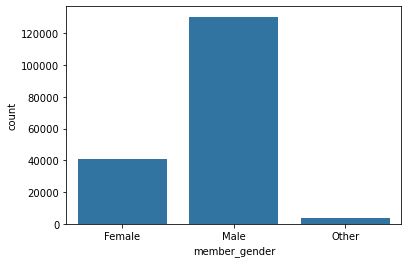

In [25]:
univariate_countplot('member_gender')

### OBSERVATION
> The ratio seems to be unbalanced. It is visually clear that the number of Males that used the bikes is more than double the number of Females that did, and furthermore, the ratio of Females to Other is about 10:1

 ###  QUESTION 2
 > How often were trips shared?

### VISUALIZATION

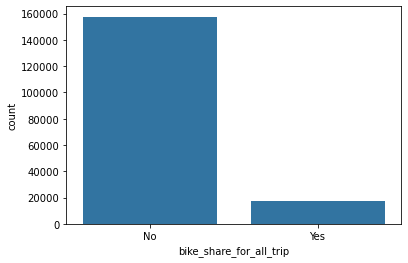

In [26]:
univariate_countplot('bike_share_for_all_trip')

### OBSERVATION
> The ratio of the number of times the bike trip was shared is proportionally unbalanced. It can be seen that the ratio is somewhat along the lines of 8:1, No to Yes.

 ###  QUESTION 3
 > Which user type used the bikes more?

### VISUALIZATION

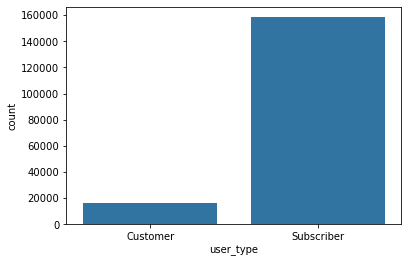

In [27]:
univariate_countplot('user_type')

### OBSERVATION
> It can be seen that the number of subscribers that used the bike are significatly higher than the random customers that did. Later on, I will explore the period of the day that the users used the bike, to see when most of the non-subscribers used the bike.

 ###  QUESTION 4
 > Which day of the week did the members use bikes the most?

### VISUALIZATION

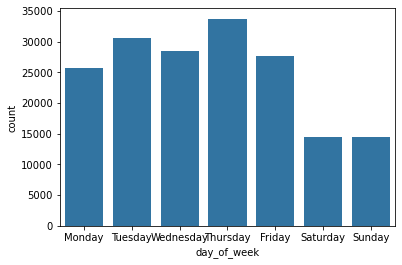

In [28]:
univariate_countplot('day_of_week')

### OBSERVATION
> It can be seen from the plot above that the days with the least bike trips are the weekend. Can I conclude that it is mainly workers that use the bike? This will lead to the next plot.

 ###  QUESTION 5
 > Which hour of the day did the members use the bike trips the most?

### VISUALIZATION

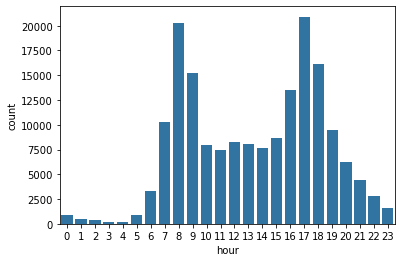

In [29]:
univariate_countplot('hour')

### OBSERVATION
> It can be seen that the hours with the most occurence are; 7am, 8am, 9am, 4pm, 5pm, 6pm, and 7pm sort of. This increases my suspicion that the bike trips are mainly used by workers, especially the ones that resume by 8-10am, and close for the day by 4-6pm or therabout. Of course though, I can not jump into conclusion here, since I do not really have evidences to back that.

 ###  QUESTION 6
 > What is the distribution of the member age?

### VISUALIZATION

In [30]:
df.member_age.describe()

count    174952.000000
mean         34.196865
std          10.118731
min          18.000000
25%          27.000000
50%          32.000000
75%          39.000000
max         141.000000
Name: member_age, dtype: float64

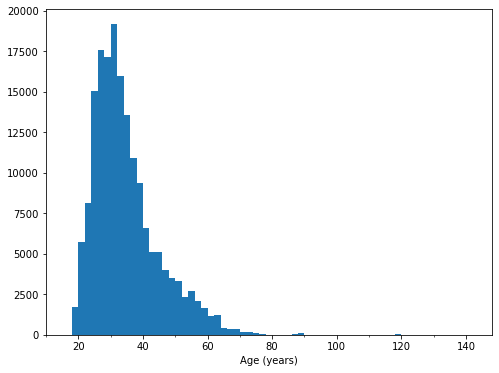

In [31]:
bins=np.arange(18, df.member_age.max()+2, 2)
plt.figure(figsize=[8,6])
plt.hist(data=df, x='member_age', bins=bins)
plt.xlabel('Age (years)')
plt.gca().set_xticks(np.arange(10, 150, 10), minor=True);

#### Logically, I will say this distrubution contains some outliers. So, I will put that into consideration.

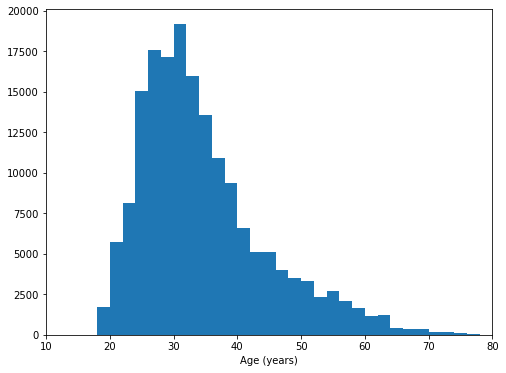

In [32]:
bins=np.arange(18, df.member_age.max()+2, 2)
plt.figure(figsize=[8,6])
plt.hist(data=df, x='member_age', bins=bins)
plt.xlabel('Age (years)')
plt.xlim([10,80]);

### OBSERVATION
> After scrutinizing the first plot, and realizing that there are potentially some outliers, I tried to cut the plot, by removing the outliers, to be able to visibly see the trend. It can be seen that it is a right skew distribution. The plot also shows that majority of the members are within the range of 25-40. 

 ###  QUESTION 7
 > What is the distribution of the duration spent during a trip?

### VISUALIZATION

In [33]:
df['duration_min'] = df['duration_sec']/60
df.duration_min.describe()

count    174952.000000
mean         11.733379
std          27.370082
min           1.016667
25%           5.383333
50%           8.500000
75%          13.150000
max        1409.133333
Name: duration_min, dtype: float64

Text(0.5, 0, 'Duration (min)')

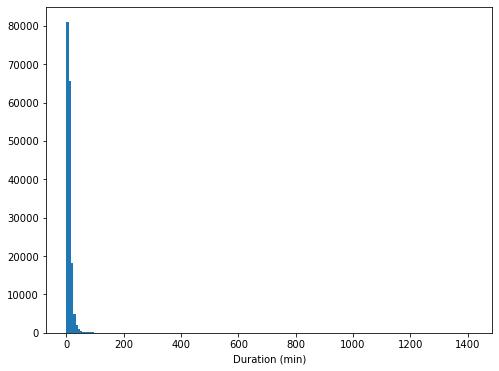

In [34]:
bins= np.arange(0, df.duration_min.max()+8, 8)
plt.figure(figsize=[8,6])
plt.hist(data=df, x='duration_min', bins=bins)
plt.xlabel('Duration (min)')

In [35]:
df.duration_min.quantile(0.95)

25.516666666666666

#### There is clearly an outlier here, if the approximate duration of the average trip is about 8.5 minutes and the 95th percentile is about 25.5 minutes,  then a trip of over 1400 mins is weird. I will fix that. 

(0.0, 100.0)

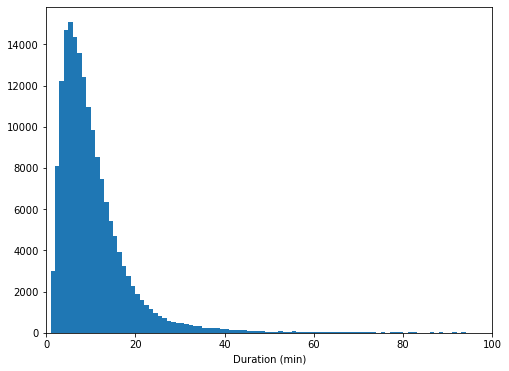

In [36]:
bins= np.arange(0, df.duration_min.max()+1, 1)
plt.figure(figsize=[8,6])
plt.hist(data=df, x='duration_min', bins=bins)
plt.xlabel('Duration (min)')
plt.xlim([0,100])

#### Next, I will check the distribution logarithmically.

In [37]:
np.log10(df.duration_min).describe()

count    174952.000000
mean          0.929673
std           0.305190
min           0.007179
25%           0.731051
50%           0.929419
75%           1.118926
max           3.148952
Name: duration_min, dtype: float64

Text(0.5, 0, 'Duration (min)')

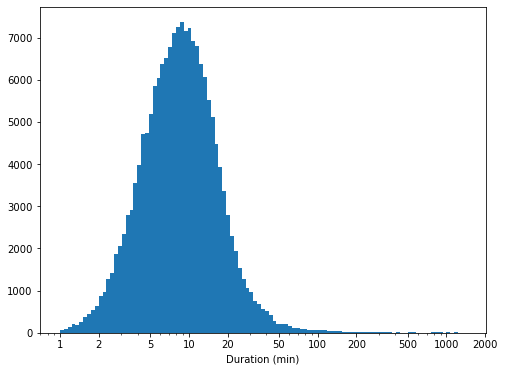

In [38]:
bins=10 ** np.arange(0, 3.15 + 0.03, 0.03)
ticks = [1,2,5,10,20,50,100,200,500,1000,2000]
labels = ['{}'.format(v) for v in ticks]
plt.figure(figsize=[8,6])
plt.hist(data=df, x='duration_min', bins=bins)
plt.xscale('log')
plt.xticks(ticks, labels)
plt.xlabel('Duration (min)')

<ipython-input-39-c2d67a852fd7>:9: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim([0,150])


(0.6958249547006051, 150.0)

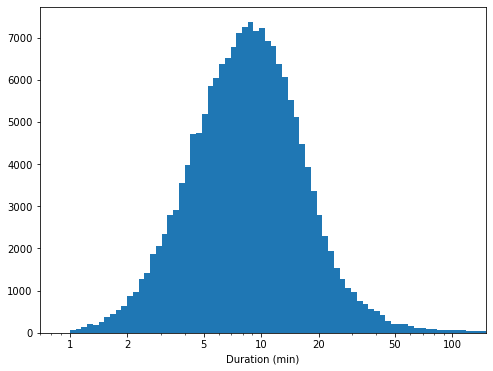

In [39]:
bins=10 ** np.arange(0, 3.15 + 0.03, 0.03)
ticks = [1,2,5,10,20,50,100,200,500,1000,2000]
labels = ['{}'.format(v) for v in ticks]
plt.figure(figsize=[8,6])
plt.hist(data=df, x='duration_min', bins=bins)
plt.xscale('log')
plt.xticks(ticks, labels)
plt.xlabel('Duration (min)')
plt.xlim([0,150])

### OBSERVATION
> After plotting normally and logarithmically, it can be seen clearly that the latter gave more insight into the distribution. The distribution can be said to be right skewed, but if the outliers are not considered, the distribution is roughly a normal distribution, as seen above.

### Before going ahead with the exploration, I would remove some rows with the outliers I have come across so far. 

In [40]:
outliers = ((df.duration_min>100) | (df.member_age>70))
df = df[-outliers]
df.shape

(173676, 20)

#### I could have removed more, but I dont want to lose a lot of records.

### Distributions of the variables of interest. 

> Age: The distribution of age was right skewed, with some obvious outliers at the end of the axis. I then cut off the tail of the axis, to show the area of focus. 

> Duration: This distribution was also right skewed, with again some outliers. Again, I cut off the outliers. Still, the satisfaction was low, so I went ahead to plot the distribution logartithmically. Based on the plots, I decided to use the max limit as 100 minutes. Also, using a code, it was seen that about 95% of the duration was less than 30 minutes, meaning the trips from these stations are usually relatively short.

> I performed some preliminary wrangling on the dataset, before the exploration and during the exploration. I converted many datatypes, I introduced new columns, and dropped a column. Then, during the exploration, I deleted some rows that I suspected to be outliers. I realized that after deleting the rows, the dataset still had significant amount of records, so it would not matter much. 

## BIVARIATE EXPLORATION

 ###  QUESTION 8
 > What is the relationship between the member age and the day of the week when the bike trip was made?

### VISUALIZATION

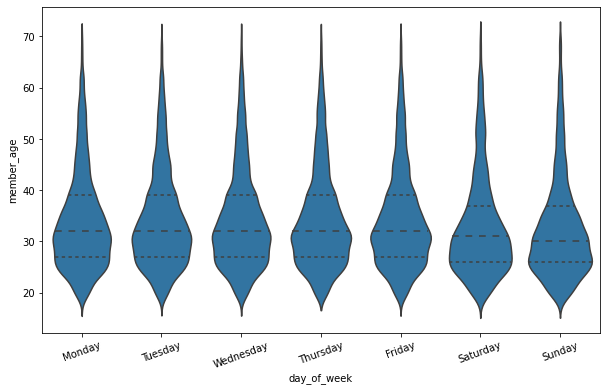

In [41]:
plt.figure(figsize= (10,6))
sns.violinplot(data = df, x = 'day_of_week', y = 'member_age', color = base_color, inner = 'quartile')
plt.xticks(rotation = 20);

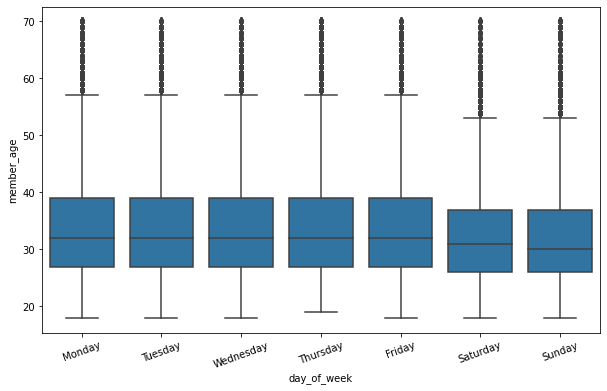

In [42]:
plt.figure(figsize= (10,6))
sns.boxplot(data = df, x = 'day_of_week', color = base_color, y = 'member_age')
plt.xticks(rotation = 20);

### OBSERVATION
> If there is anything I notice from these two plots, it is that there are still several outliers despite treating them vaguely earlier. 

> I noticed that the plots for the weekdays look really similar, the quartiles are similar. With this, I have a suspicion that;
(i) roughly same people use the bike trip everyday, and most of these people are the subscribers. 
(ii) also that, the people that use this trip, use it to and fro their work place. 

> With these suspicions, I will explore  the relationship between these factors next. 

 ###  QUESTION 9
 > What is the relationship between the the duration of the trip and the day of the week when the bike trip was made?

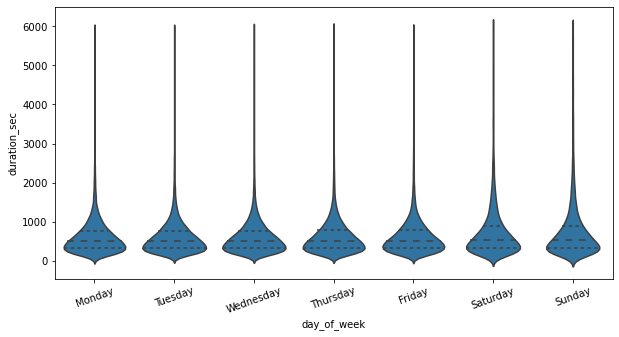

In [43]:
plt.figure(figsize= (10,5))
sns.violinplot(data = df, x = 'day_of_week', y = 'duration_sec', color = base_color, inner = 'quartile')
plt.xticks(rotation = 20);

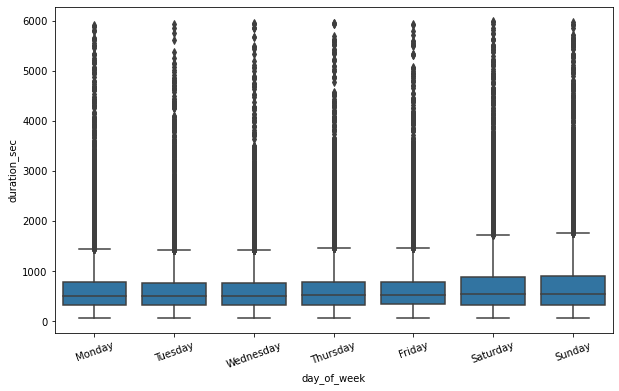

In [44]:
plt.figure(figsize= (10,6))
sns.boxplot(data = df, x = 'day_of_week', color = base_color, y = 'duration_sec')
plt.xticks(rotation = 20);

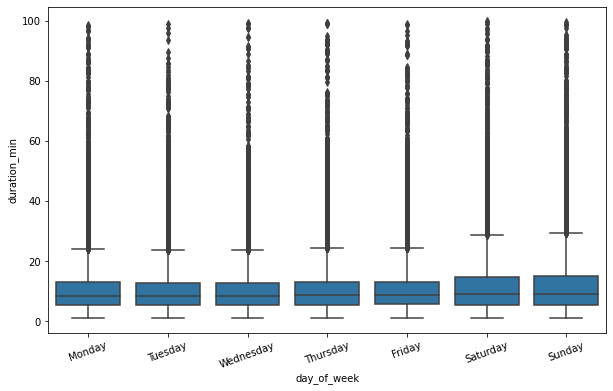

In [45]:
plt.figure(figsize= (10,6))
sns.boxplot(data = df, x = 'day_of_week', color = base_color, y = 'duration_min')
plt.xticks(rotation = 20);

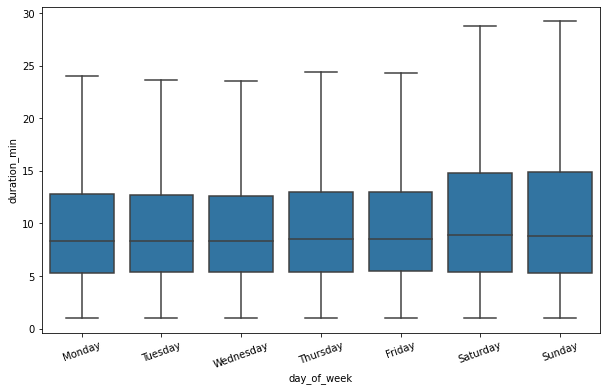

In [46]:
plt.figure(figsize= (10,6))
sns.boxplot(data = df, x = 'day_of_week', y = 'duration_min', color = base_color, showfliers = False)
plt.xticks(rotation = 20);

### OBSERVATION
> Just like the previous plot, here, the outliers are highly obvious and affecting the visualization and interpretation of the exploration. Hence, I made another exploration without the outliers to show the relationship. Here, boxplot showed one of its advantages over the violinplot.

> Almost like the relationship between the age of the members and the day of the week in which they used the trip, here, we can see that the relationship between the duration spent on each trip across the weekdays are very similar to each other. 

 ###  QUESTION 10
 > What is the relationship between the type of user that used the bike trips, the start hour of the trips and the days of the week?

### VISUALIZATION

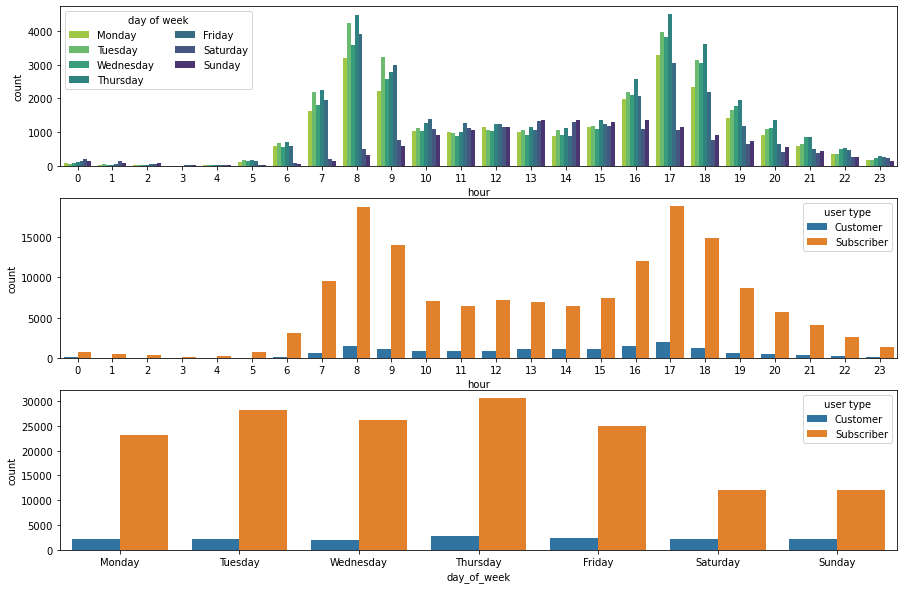

In [47]:
fig, ax = plt.subplots(nrows=3, figsize=[15,10])
sns.countplot(data=df, x='hour', hue='day_of_week', palette='viridis_r', ax=ax[0])
ax[0].legend(title='day of week', ncol=2)
sns.countplot(data=df, x='hour', hue='user_type', ax=ax[1])
ax[1].legend(title='user type')
sns.countplot(data=df, x='day_of_week', hue='user_type', ax=ax[2])
ax[2].legend(title='user type')

### OBSERVATION
> The highest bike trips started at 8am and 5pm, and this mainly peaked on Thursday.

> Overall, weekdays have higher number of trips than weekends except two time frames:
(1) 10 AM — 3 PM (the usual office hours) in which both have approx. same number of trips.
(2) 12 midnight to 2 AM in which weekends have more trips than weekdays.

>With this plot, I think my suspicion is somewhat correct, that bike trips were mainly used by the office workers, and most of them are subscribers.

 ###  QUESTION 11
 > What is the relationship between gender and the other categorical variables?

### VISUALIZATION

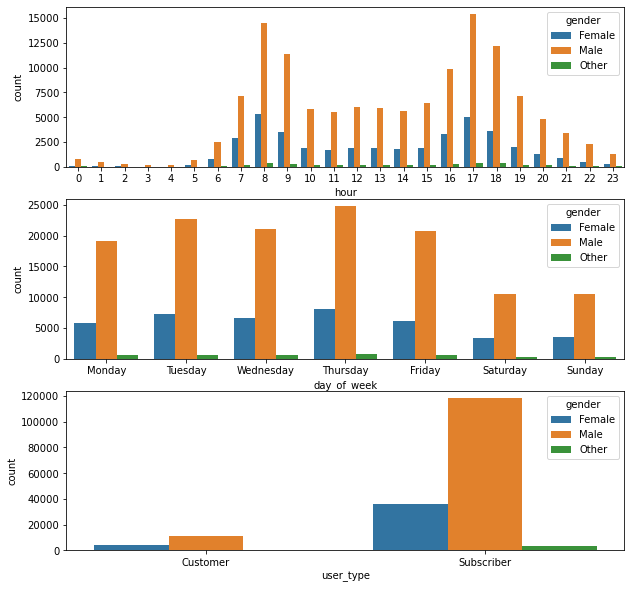

In [48]:
fig, ax = plt.subplots(nrows=3, figsize=[10,10])
sns.countplot(data=df, x='hour', hue='member_gender',  ax=ax[0])
ax[0].legend(title='gender')
sns.countplot(data=df, x='day_of_week', hue='member_gender', ax=ax[1])
ax[1].legend(title='gender')
sns.countplot(data=df, x='user_type', hue='member_gender', ax=ax[2])
ax[2].legend(title='gender')

### OBSERVATION
> Overall, male bikers have higher number of trips as compared to female and other gender type across all the times of the day (hour) and days of the week.

> Most of the Subscriber bikers are male. Most of the Customer bikers are also male.

> There is either no 'member' in the customer user type, or the count is relatively very low.


###  QUESTION 12
 > What is the relationship between the bike share situation and the other categorical variables?

### VISUALIZATION

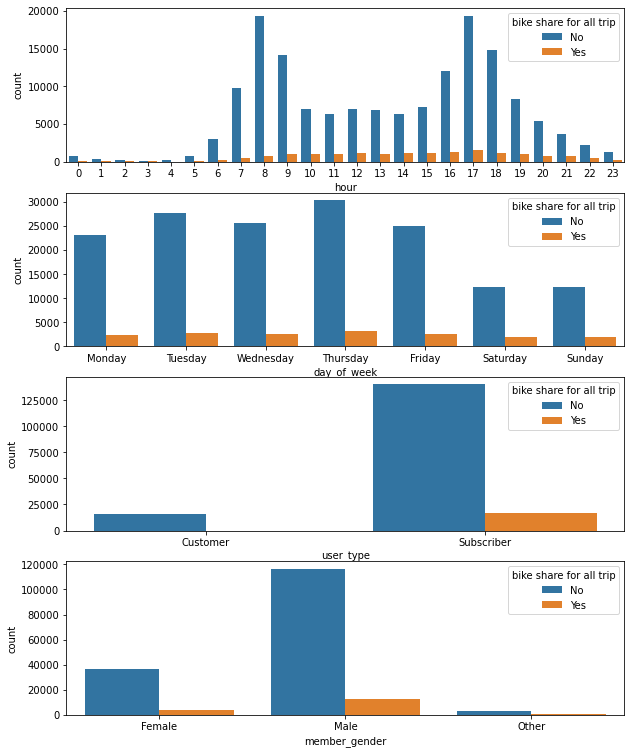

In [49]:
fig, ax = plt.subplots(nrows=4, figsize=[10,13])
sns.countplot(data=df, x='hour', hue='bike_share_for_all_trip', ax=ax[0])
ax[0].legend(title='bike share for all trip')
sns.countplot(data=df, x='day_of_week', hue='bike_share_for_all_trip', ax=ax[1])
ax[1].legend(title='bike share for all trip')
sns.countplot(data=df, x='user_type', hue='bike_share_for_all_trip', ax=ax[2])
ax[2].legend(title='bike share for all trip')
sns.countplot(data=df, x='member_gender', hue='bike_share_for_all_trip', ax=ax[3])
ax[3].legend(title='bike share for all trip')

### OBSERVATION
> It seems as though customers do not share bike for their trips.

> The closest the count of bike share for the trips is to not sharing the trips is at 3am. It might seem as though at that time, bikers do not care, and they just want to get to their destination. 

 ###  QUESTION 13
 > What is the relationship between the duration of the trip and the categorical variables?

### VISUALIZATION

In [50]:
categorical_variable = ['day_of_week', 'user_type', 'member_gender', 
                        'bike_share_for_all_trip', 'hour']

In [51]:
def numeric_vs_categorical(y):
    fig, ax = plt.subplots(nrows=5, figsize=[10,20])
    for i in range(5):
        sns.boxplot(data=df, x= categorical_variable[i], y= y, ax=ax[i], color= base_color, showfliers=False)
        i += 1

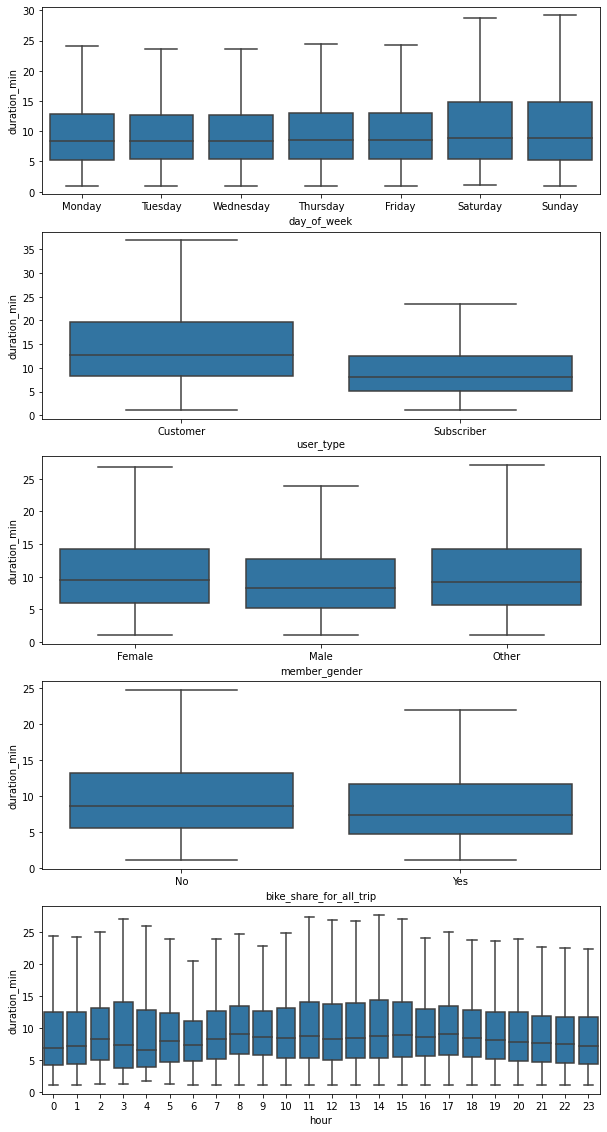

In [52]:
numeric_vs_categorical('duration_min')

### OBSERVATION
> Bike trips that are shared is relatively lower than the ones that are shared.

> Male tend to use the trips for lesser duration.

> Customers tend to use the trips for longer duration.

> Weekend trips seem to go on for longer duration as compared to the ones on weekdays.

 ###  QUESTION 14
 > What is the relationship between the age of the member and the categorical variables?

### VISUALIZATION

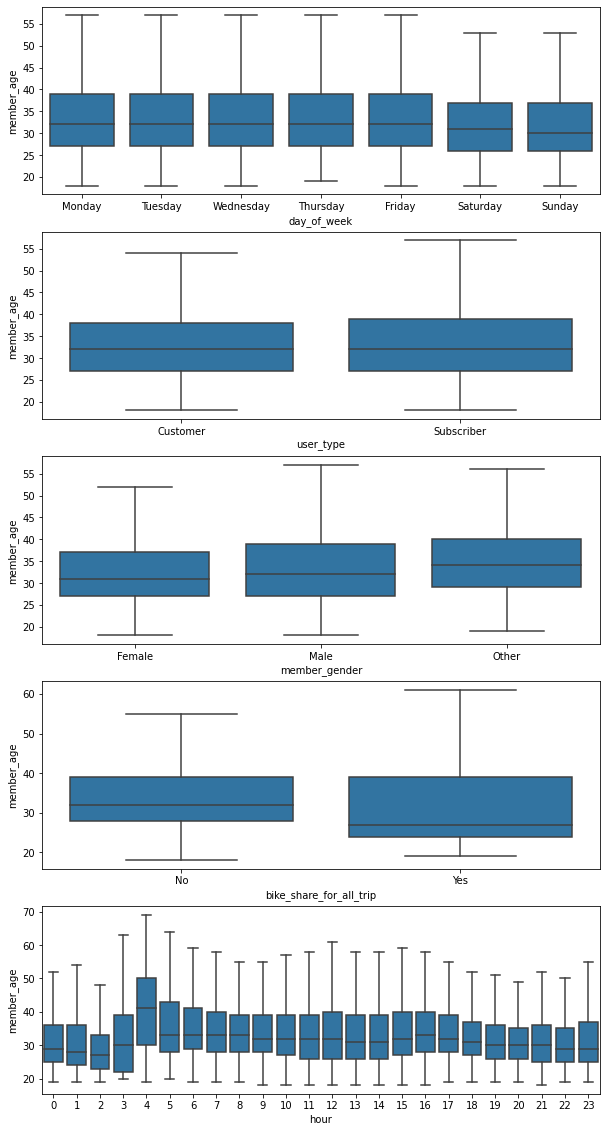

In [53]:
numeric_vs_categorical('member_age')

### OBSERVATION
> Bike sharing seems to occur more among the older members. Although, it seems that on average, the members that share the trips are younger than the ones that do not. 

> Averagely and on general, the male members are older than the female members. 

> The subscribers are older than the customers too, averagely and generally.

 ###  QUESTION 15
 > What is the relationship between the age of the member and the duration of the trips?

### VISUALIZATION

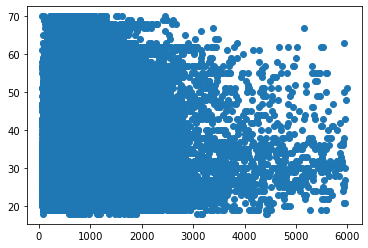

In [54]:
plt.scatter(data = df, x= 'duration_sec', y = 'member_age')

In [55]:
def log_trans(x, inverse=False):
    if not inverse:
        return np.log10(x)
    else:
        return np.power(10, x)

Text(0, 0.5, 'Duration in log(min)')

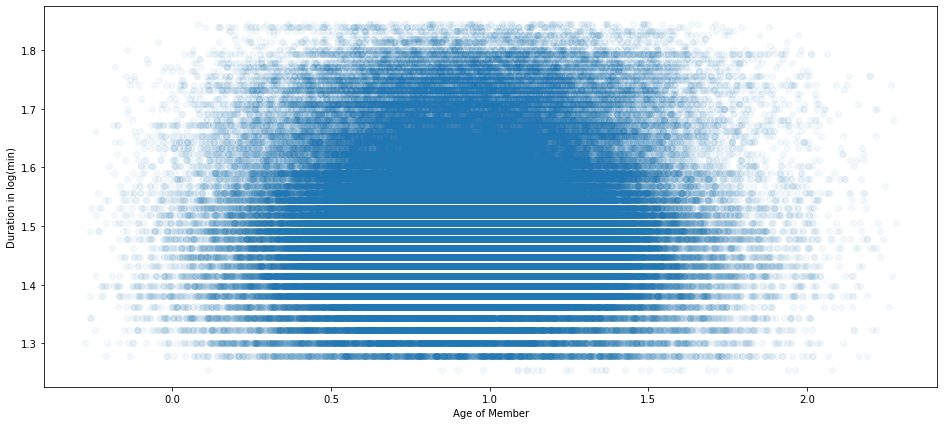

In [56]:
plt.figure(figsize = (16,7))
sns.regplot(data = df, x = df['duration_min'].apply(log_trans), y = df['member_age'].apply(log_trans)
            ,x_jitter=0.3, scatter_kws={'alpha':1/20}, fit_reg=False)
plt.xlabel('Age of Member')
plt.ylabel('Duration in log(min)')

Text(0, 0.5, 'Duration in log(min)')

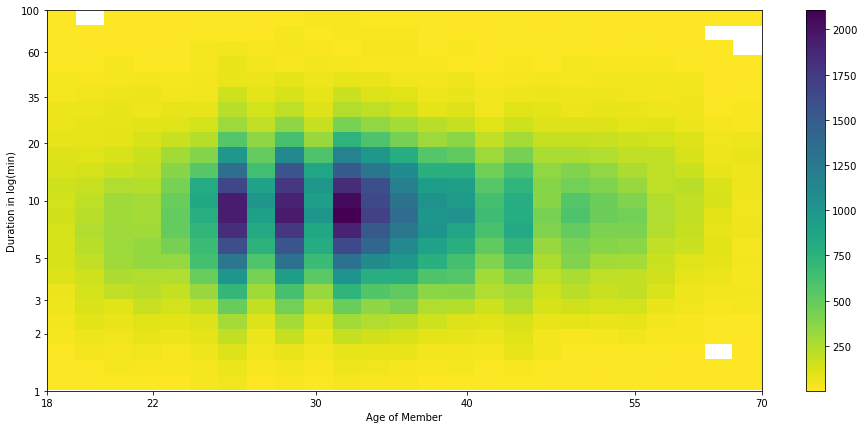

In [57]:
plt.figure(figsize = (16,7))
plt.hist2d(data = df, y = df['duration_min'].apply(log_trans), 
           x = df['member_age'].apply(log_trans), cmin= 0.5, bins = 25, cmap = 'viridis_r')
plt.colorbar()
xtick_locs = [18, 22, 30, 40, 55, 70]
ytick_locs = [1, 2, 3, 5, 10, 20,35, 60, 100]
plt.yticks(log_trans(ytick_locs), ytick_locs)
plt.xticks(log_trans(xtick_locs), xtick_locs)
plt.xlabel('Age of Member')
plt.ylabel('Duration in log(min)')

### OBSERVATION
> from the plots above, the one that gives the better insight is the heatmap(log scale). There are about three concentrated area where the relationship is the strongest; they fall within the duration limit of 5 and 12 minutes, and 25 years old and 35 years old. 

### Interesting relationships observed.

> I can conclude that there is no linear relationship between the age of the members and the duration of the trips. 

> There is no significant difference between the average age of the bikers starting between 5 AM to 5 PM

> On average, bikers starting between 12 midnight to 3 AM have lower age as compared to other time frames

> On average, female and the members of other genders have longer bike trips as compared to the male members.

> The members that use the trips on weekdays  tend to be older than the ones on weekends.

> The duration of the trips and age of bikers who did not use the bike share for their trips is higher as compared to those who used it for their trip.

> The trips involving bike sharing have more older people than those which do not have bike share.

## MULTIVARIATE EXPLORATION

#### In this session, I will mainly be looking at the relationship between; a numerical variable and two categorical variables, two numerical variables and a categorical variable.

 ###  QUESTION 16
 > Explore the relationship between the duration of the trip, the days of the week and the other categoorical variables.

### VISUALIZATION

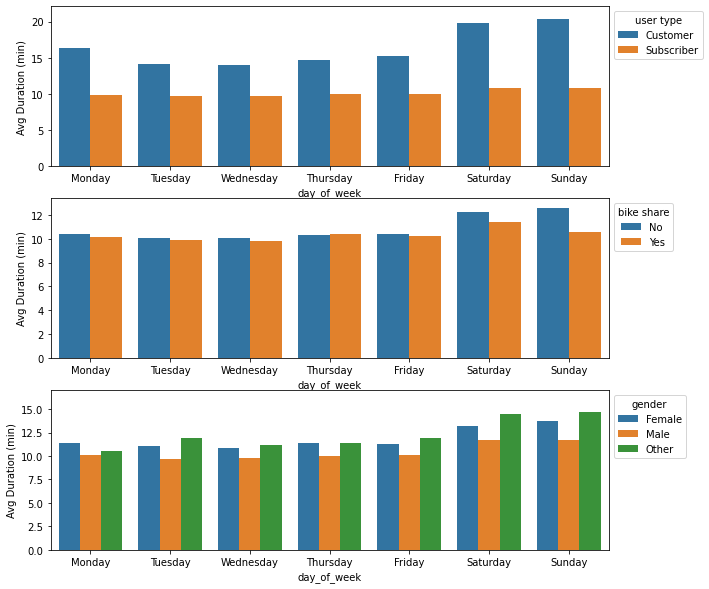

In [58]:
fig, ax = plt.subplots(nrows=3, figsize=[10,10])
sns.barplot(data=df, x='day_of_week', y='duration_min', hue='user_type', errwidth=0, ax=ax[0])
ax[0].set_ylabel('Avg Duration (min)')
ax[0].legend(loc=2, title='user type', bbox_to_anchor=(1,1))
sns.barplot(data=df, x='day_of_week', y='duration_min', hue='bike_share_for_all_trip', errwidth=0, ax=ax[1])
ax[1].set_ylabel('Avg Duration (min)')
ax[1].legend(loc=2, title='bike share', bbox_to_anchor=(1,1))
sns.barplot(data=df, x='day_of_week', y='duration_min', hue='member_gender', errwidth=0, ax=ax[2])
ax[2].set_ylabel('Avg Duration (min)')
ax[2].legend(loc=2, title='gender', bbox_to_anchor=(1,1))

### OBSERVATION
> The average duration of trips on weekdays, whether the bike is shared or not is roughly around 10 minutes. Not exactly the same can be said for the trips on weekends.

> On none of the days of the week did the average duration of the trips of the male members exceed that of the either of the female members and the members of the other gender. 

> It can also be seen clearly that the customers usually use the bike trips more on weekend and the trips go on for about 20 minutes. 

 ###  QUESTION 17
 > Explore the relationship between the duration of the trip, the hours and the other categoorical variables.

### VISUALIZATION

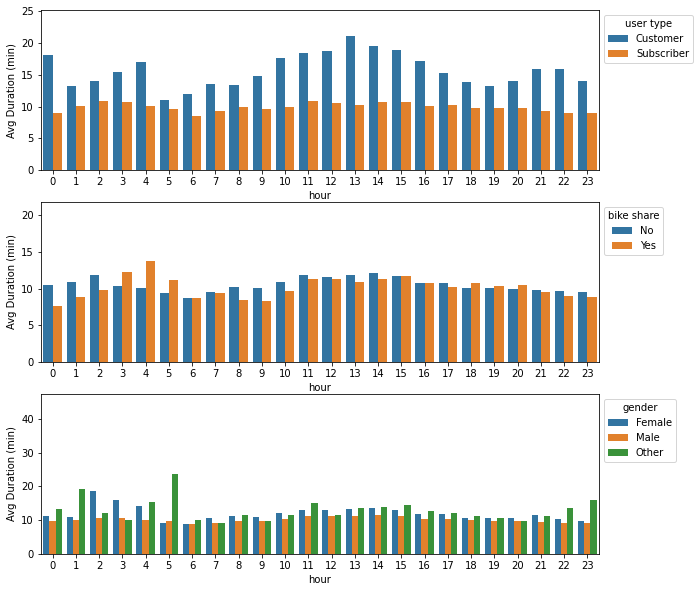

In [59]:
fig, ax = plt.subplots(nrows=3, figsize=[10,10])
sns.barplot(data=df, x='hour', y='duration_min', hue='user_type', errwidth=0, ax=ax[0])
ax[0].set_ylabel('Avg Duration (min)')
ax[0].legend(loc=2, title='user type', bbox_to_anchor=(1,1))
sns.barplot(data=df, x='hour', y='duration_min', hue='bike_share_for_all_trip', errwidth=0, ax=ax[1])
ax[1].set_ylabel('Avg Duration (min)')
ax[1].legend(loc=2, title='bike share', bbox_to_anchor=(1,1))
sns.barplot(data=df, x='hour', y='duration_min', hue='member_gender', errwidth=0, ax=ax[2])
ax[2].set_ylabel('Avg Duration (min)')
ax[2].legend(loc=2, title='gender', bbox_to_anchor=(1,1))

### OBSERVATION

> The longest trips are generally made by the customers and they start around  11 am to 3 pm, and 12 am.

> The only period of the day when the duration of the trips with the bike share is higher than when there is no bike share, is around 3 am to 5 am.

> The duration of the trips made by members of the other gender at around 5am, even 1 am and 11 pm is relatively higher than the other two genders. 

 ###  QUESTION 18

>Explore the relationship between the age of the members, the hour of the day and the categorical variables.

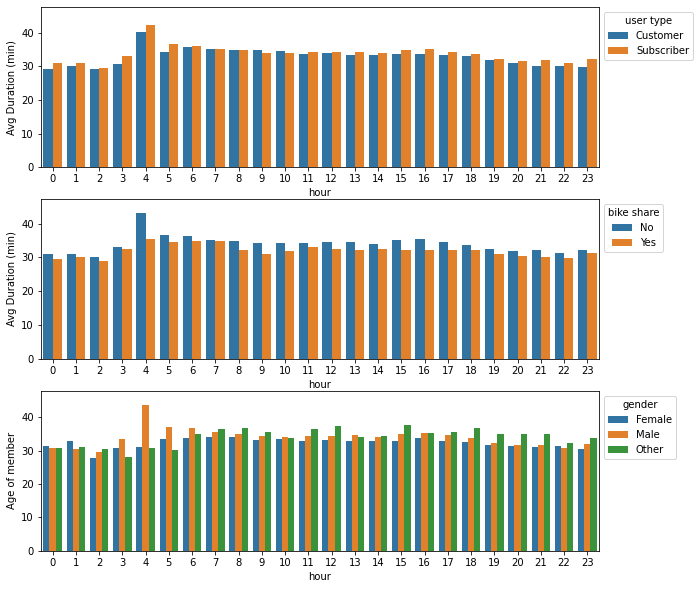

In [60]:
fig, ax = plt.subplots(nrows=3, figsize=[10,10])
sns.barplot(data=df, x='hour', y='member_age', hue='user_type', errwidth=0, ax=ax[0])
ax[0].set_ylabel('Avg Duration (min)')
ax[0].legend(loc=2, title='user type', bbox_to_anchor=(1,1))
sns.barplot(data=df, x='hour', y='member_age', hue='bike_share_for_all_trip', errwidth=0, ax=ax[1])
ax[1].set_ylabel('Avg Duration (min)')
ax[1].legend(loc=2, title='bike share', bbox_to_anchor=(1,1))
sns.barplot(data=df, x='hour', y='member_age', hue='member_gender', errwidth=0, ax=ax[2])
ax[2].set_ylabel('Age of member')
ax[2].legend(loc=2, title='gender', bbox_to_anchor=(1,1))

### OBSERVATION
> The oldest customers start their trips at around 4am, the youngest at about 2am.

> At 4am, the age of the male members is seen to be way higher than the female members and the members of the other gender. 

###  QUESTION 19
 > Explore the relationship between the age of the members, the day of the week and the categorical variables.

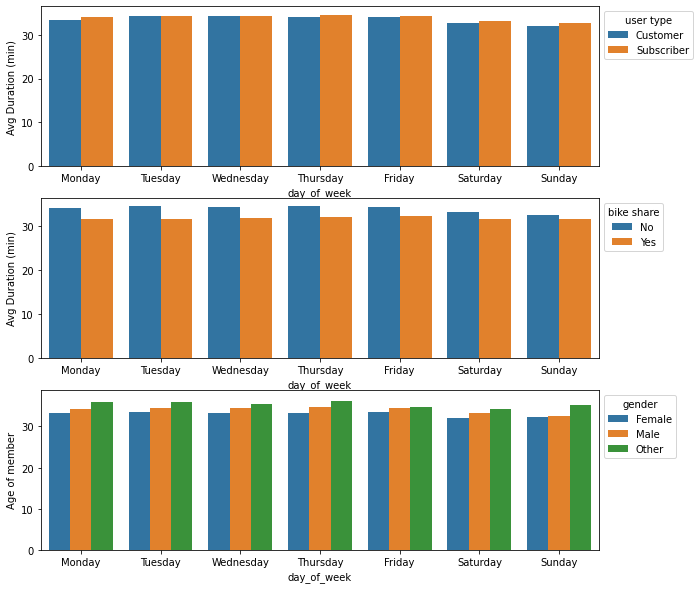

In [61]:
fig, ax = plt.subplots(nrows=3, figsize=[10,10])
sns.barplot(data=df, x='day_of_week', y='member_age', hue='user_type', errwidth=0, ax=ax[0])
ax[0].set_ylabel('Avg Duration (min)')
ax[0].legend(loc=2, title='user type', bbox_to_anchor=(1,1))
sns.barplot(data=df, x='day_of_week', y='member_age', hue='bike_share_for_all_trip', errwidth=0, ax=ax[1])
ax[1].set_ylabel('Avg Duration (min)')
ax[1].legend(loc=2, title='bike share', bbox_to_anchor=(1,1))
sns.barplot(data=df, x='day_of_week', y='member_age', hue='member_gender', errwidth=0, ax=ax[2])
ax[2].set_ylabel('Age of member')
ax[2].legend(loc=2, title='gender', bbox_to_anchor=(1,1))

### OBSERVATION
> There is a 'constant' trend in the order in the gender, and the bike share. This is not entirely the case for the user type, as there is a visually equal age for the two user types on Tuesday and Wednesday, as opposed to the trend on the other days of the week.

 ###  QUESTION 20
 > Explore the relationship between the age of the members, the duration of the trips and the categorical variables.

### VISUALIZATION

#### Day of the week

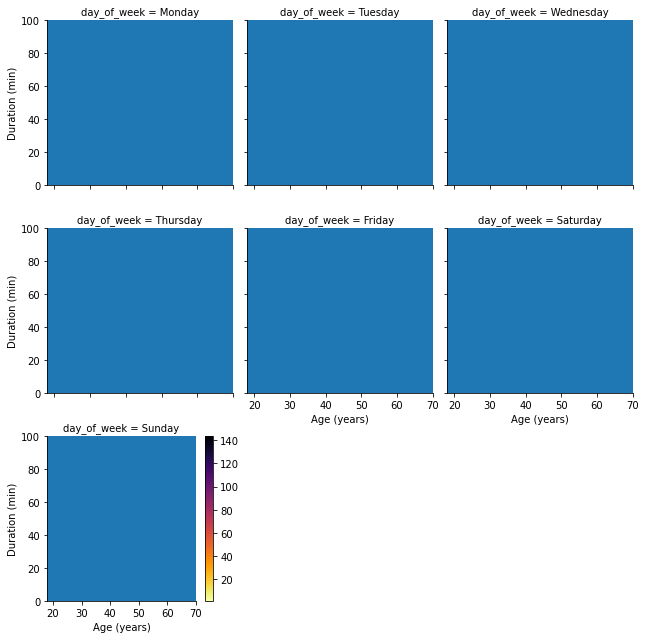

In [62]:
#palette=kwargs.pop('color')
bins_x =np.arange(18, df.member_age.max()+2, 2)
bins_y =np.arange(0, df.duration_min.max()+1, 1)
g = sns.FacetGrid(data = df, col = 'day_of_week', col_wrap=3, height=3)
g.map(plt.hist2d, 'member_age', 'duration_min', bins=[bins_x,bins_y], cmap='inferno_r', cmin = 0.5)
plt.colorbar()
g.set_xlabels('Age (years)')
g.set_ylabels('Duration (min)')

#### This does not seem right, I will try it logarithmically.

In [63]:
df['duration_log'] = df['duration_min'].apply(log_trans)

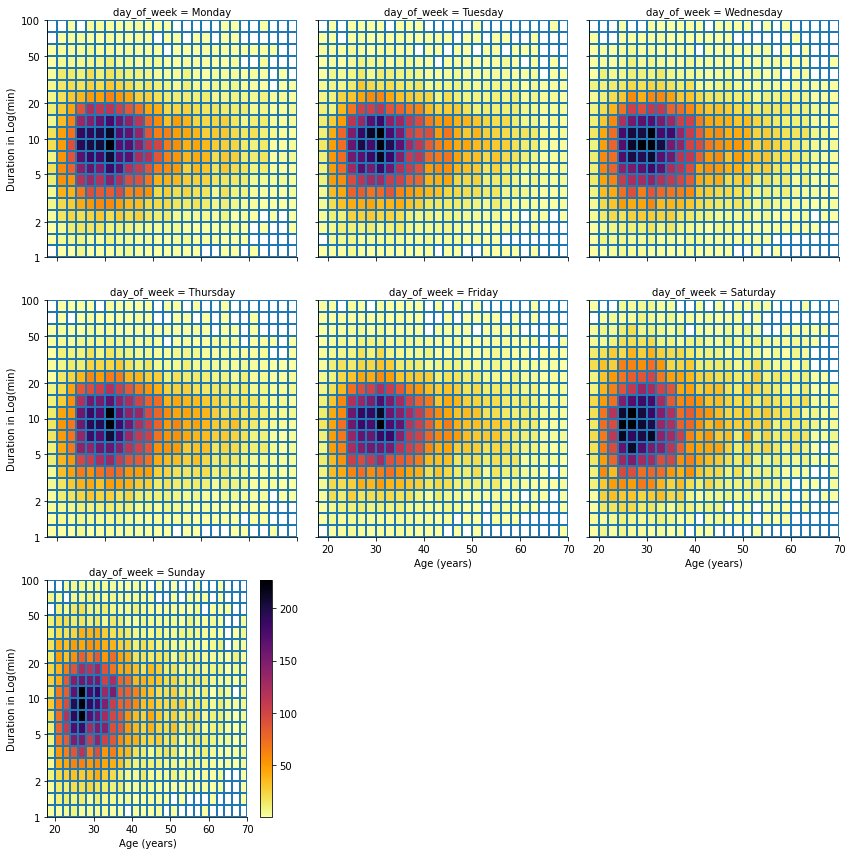

In [64]:
bins_x =np.arange(18, df.member_age.max()+2, 2)
bins_y =np.arange(0, 2+0.1, 0.1)
g = sns.FacetGrid(data = df, col = 'day_of_week', col_wrap=3, height=4)
g.map(plt.hist2d, 'member_age', 'duration_log', bins=[bins_x,bins_y], cmap='inferno_r', cmin = 0.5)
plt.colorbar()
g.set_xlabels('Age (years)')
g.set_ylabels('Duration in Log(min)')
plt.yticks(log_trans(np.array([1,2,5,10,20,50,100])),[1,2,5,10,20,50,100]);

#### Hours of the week

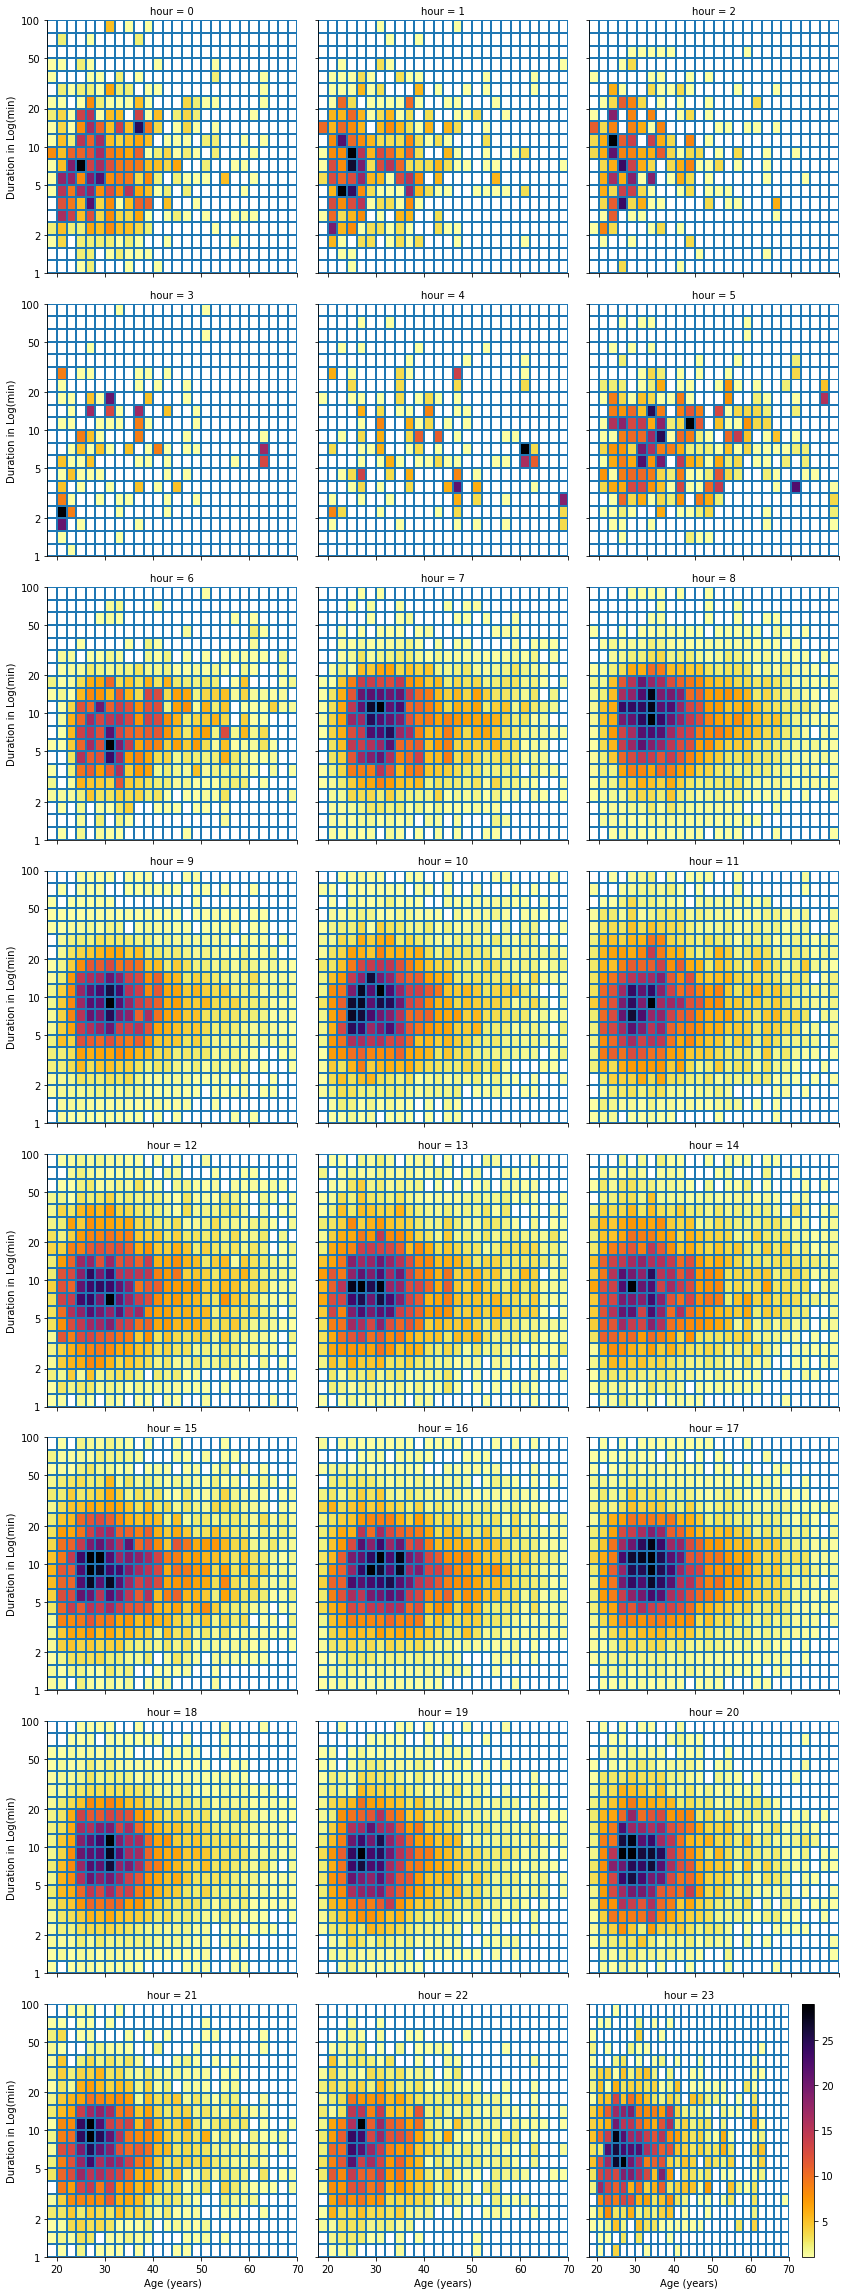

In [65]:
bins_x =np.arange(18, df.member_age.max()+2, 2)
bins_y =np.arange(0, 2+0.1, 0.1)
g = sns.FacetGrid(data = df, col = 'hour', col_wrap=3, height=4)
g.map(plt.hist2d, 'member_age', 'duration_log', bins=[bins_x,bins_y], cmap='inferno_r', cmin = 0.5)
plt.colorbar()
g.set_xlabels('Age (years)')
g.set_ylabels('Duration in Log(min)')
plt.yticks(log_trans(np.array([1,2,5,10,20,50,100])),[1,2,5,10,20,50,100]);

#### User Type

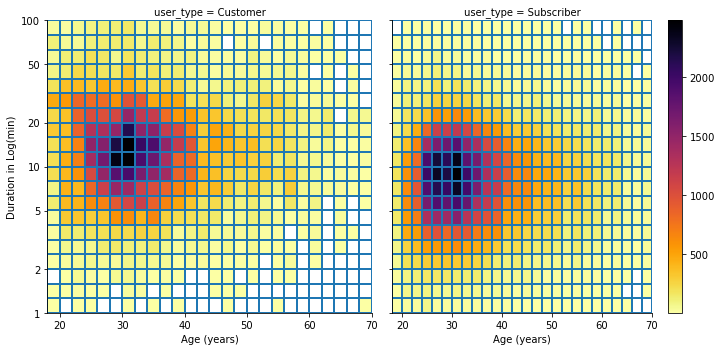

In [66]:
bins_x =np.arange(18, df.member_age.max()+2, 2)
bins_y =np.arange(0, 2+0.1, 0.1)
g = sns.FacetGrid(data = df, col = 'user_type', col_wrap=3, height=5)
g.map(plt.hist2d, 'member_age', 'duration_log', bins=[bins_x,bins_y], cmap='inferno_r', cmin = 0.5)
plt.colorbar()
g.set_xlabels('Age (years)')
g.set_ylabels('Duration in Log(min)')
plt.yticks(log_trans(np.array([1,2,5,10,20,50,100])),[1,2,5,10,20,50,100]);

#### Gender

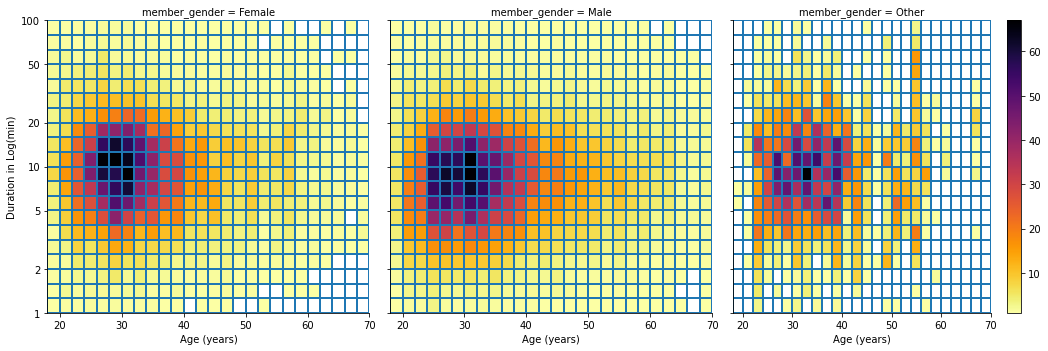

In [67]:
bins_x =np.arange(18, df.member_age.max()+2, 2)
bins_y =np.arange(0, 2+0.1, 0.1)
g = sns.FacetGrid(data = df, col = 'member_gender', col_wrap=3, height=5)
g.map(plt.hist2d, 'member_age', 'duration_log', bins=[bins_x,bins_y], cmap='inferno_r', cmin = 0.5)
plt.colorbar()
g.set_xlabels('Age (years)')
g.set_ylabels('Duration in Log(min)')
plt.yticks(log_trans(np.array([1,2,5,10,20,50,100])),[1,2,5,10,20,50,100]);

#### Bike Share For All Trip

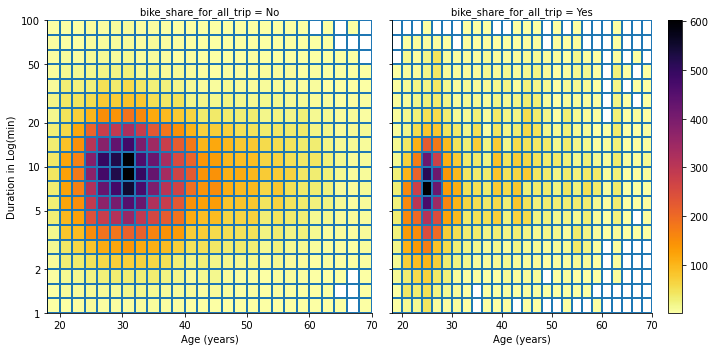

In [68]:
bins_x =np.arange(18, df.member_age.max()+2, 2)
bins_y =np.arange(0, 2+0.1, 0.1)
g = sns.FacetGrid(data = df, col = 'bike_share_for_all_trip', col_wrap=3, height=5)
g.map(plt.hist2d, 'member_age', 'duration_log', bins=[bins_x,bins_y], cmap='inferno_r', cmin = 0.5)
plt.colorbar()
g.set_xlabels('Age (years)')
g.set_ylabels('Duration in Log(min)')
plt.yticks(log_trans(np.array([1,2,5,10,20,50,100])),[1,2,5,10,20,50,100]);

### OBSERVATION

> The cloud of points is wide and shorter in length on weekdays, as compared to the ones on weekends. 

> From 12am till 5am, the relationship is not that obvious. Looking at the other hours though; from 6am to 10am and from 4am to 6pm, the cloud of points is wide and shorter in length. Whereas, from 11am to 3pm and 7pm to 11pm, the cloud of points is narrow and higher in length. 

> The cloud of points is wide and shorter in length in case of subscribers and  narrow and higher in length in case of customers.

> The cloud of points is wide and shorter in length in case of males, it is narrow and higher in length in case of females, and the relationship is not really visible in the Other gender, as compared to the first two.

- Wide and Short means the trips are taken by older people and are shorter in duration, and the Narror and High means the trips are taken by younger people and are lengthier.

### Relationships explored and observed. 

> During the course of the multivariate exploration, I explored the numeric and the categorical variables. I was able to figure out the relationship between the age of the members and the duration of the trips, with respect to the variables such as the type of membership, and so on. 


> I would not say there is any surprise per say. Most of this insights are carried on, and the multivariate ecploration helped to draw conclusions where necessary. 

## CONCLUSIONS

- This dataset and the explorations done have given a lot of insight about how the bike trips during the specified period spanned out. I was able to see how aged people like their trips; mainly not sharing, and how long they spend on the trips; not really lengthy, and other questions related to these relationships have been answered in these explorations. 

- Although some variables left untouched, my variables of interest were duly attended to.